In [18]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [19]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [20]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [21]:
data.target.shape

(569,)

In [22]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size = 0.66)

In [24]:
N, D = data.data.shape
N, D

(569, 30)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train

array([[-1.0369082 , -0.2703754 , -1.06378617, ..., -1.40819765,
        -0.28750615, -0.94117682],
       [ 0.44875493,  1.04088288,  0.56992706, ...,  1.67030689,
         0.29357605,  1.45660012],
       [-1.28451872,  2.03073149, -1.29086258, ..., -0.98880534,
        -0.98702548, -0.65166384],
       ...,
       [-1.39085452,  0.51684538, -1.38275343, ..., -1.16265328,
         0.03264424,  0.01452075],
       [ 1.73086094,  0.51218727,  1.72298047, ...,  1.81623765,
         2.20337487, -0.22074663],
       [ 0.99866295,  1.38325404,  0.94986036, ...,  0.99775643,
        -0.65577162, -0.20489961]])

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential()
model.add(Input(shape=(D,)))
model.add(Dense(1, activation = 'sigmoid'))


In [28]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [29]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
 1/12 [=>............................] - ETA: 1s - loss: 0.7825 - accuracy: 0.5312

2024-01-25 13:44:17.103582: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


12/12 [==============================] - 0s 8ms/step - loss: 0.8064 - accuracy: 0.4800 - val_loss: 0.7981 - val_accuracy: 0.5103
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.7320 - accuracy: 0.5520 - val_loss: 0.7176 - val_accuracy: 0.5928
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.6053 - val_loss: 0.6490 - val_accuracy: 0.6289
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.6587 - val_loss: 0.5912 - val_accuracy: 0.6649
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.6933 - val_loss: 0.5426 - val_accuracy: 0.7113
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.7307 - val_loss: 0.5014 - val_accuracy: 0.7423
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.7707 - val_loss: 0.4664 - val_accuracy: 0.7938
Epoch 8/100
12/12 [======

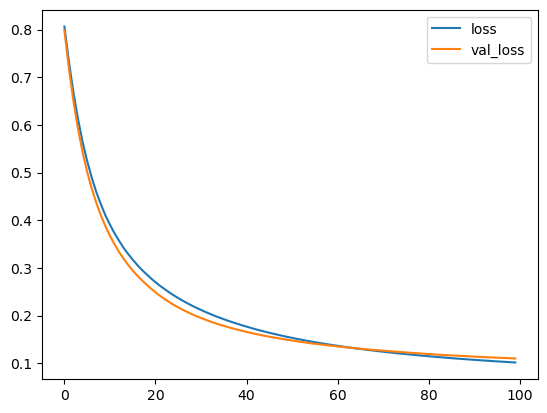

In [30]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

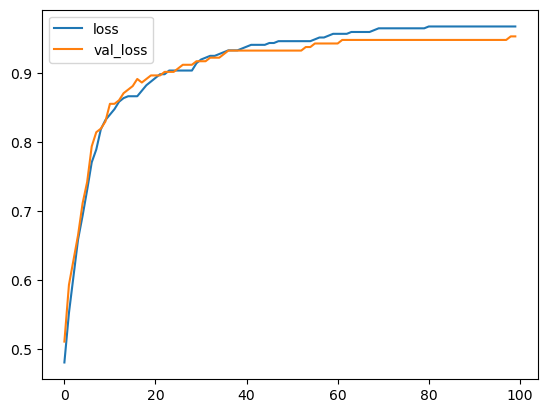

In [31]:
plt.plot(r.history['accuracy'], label = 'loss')
plt.plot(r.history['val_accuracy'], label = 'val_loss')
plt.legend()